In [226]:
import numpy as np
import pandas as pd
import random
import os
import torch
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GroupKFold, StratifiedKFold
import lightgbm as lgb

SEED=42

In [227]:
def lgb_accuracy(y_pred, y_true):
    y_true = y_true.get_label()
    preds = y_pred.reshape(len(np.unique(y_true)), -1)
    preds = preds.argmax(axis = 0)
    return 'accuracy_score', accuracy_score(y_true, preds), True

In [228]:
def seed_everything(SEED):
    random.seed(SEED)
    os.environ['PYTHONHASHSEED'] = str(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
seed_everything(SEED)

In [229]:
df = pd.read_csv("/home/cybercore/.tuan_temp/traffic_cassava/train_stack_4_models.csv")

In [230]:
df.head(10)

,image_id,label,m1_0,m1_1,m1_2,m1_3,m1_4,m2_0,m2_1,m2_2,...,m3_0,m3_1,m3_2,m3_3,m3_4,m4_0,m4_1,m4_2,m4_3,m4_4
0,1001320321.jpg,0,0.321470,0.102639,0.002045,0.018606,0.555241,0.480306,0.192867,0.004696,...,0.289547,0.242018,0.021780,0.096987,0.349668,0.316649,0.286156,0.025777,0.114045,0.257374
1,1001723730.jpg,4,0.747265,0.150927,0.016609,0.039054,0.046145,0.684273,0.192827,0.016057,...,0.694810,0.111103,0.027722,0.077502,0.088863,0.568731,0.167828,0.040317,0.142099,0.081025
2,1001749118.jpg,3,0.002027,0.001801,0.005143,0.986662,0.004366,0.005521,0.006253,0.007938,...,0.034562,0.060766,0.035980,0.812404,0.056287,0.032387,0.034429,0.031759,0.855906,0.045518
3,1002255315.jpg,3,0.003202,0.003511,0.010467,0.972487,0.010333,0.004911,0.004129,0.008598,...,0.026419,0.051470,0.038606,0.841125,0.042380,0.029387,0.036127,0.029531,0.860769,0.044186
4,1004105566.jpg,3,0.003006,0.002729,0.004511,0.975334,0.014420,0.007143,0.006346,0.006299,...,0.029591,0.052890,0.035919,0.838823,0.042776,0.038870,0.040117,0.047097,0.793221,0.080696
5,1004826518.jpg,2,0.004311,0.338769,0.543401,0.037624,0.075895,0.010675,0.580431,0.160103,...,0.031201,0.328759,0.293738,0.245645,0.100657,0.027828,0.151089,0.571239,0.150827,0.099018
6,1004881261.jpg,3,0.006720,0.005825,0.033448,0.906075,0.047933,0.005951,0.007936,0.023353,...,0.030120,0.047524,0.051423,0.817795,0.053139,0.032059,0.030314,0.049845,0.795592,0.092190
7,100533489.jpg,2,0.032836,0.608033,0.100719,0.101464,0.156948,0.074875,0.207202,0.111410,...,0.044879,0.495398,0.100017,0.154281,0.205425,0.074829,0.536859,0.077413,0.195952,0.114948
8,100560400.jpg,4,0.015634,0.013347,0.022131,0.148242,0.800646,0.034172,0.016037,0.010674,...,0.039390,0.041664,0.027499,0.147186,0.744262,0.049794,0.037763,0.029514,0.264923,0.618006
9,1007700625.jpg,3,0.002975,0.010594,0.010280,0.973424,0.002728,0.003491,0.005146,0.006752,...,0.027141,0.037074,0.038474,0.864339,0.032973,0.031457,0.039176,0.033075,0.858470,0.037822


In [231]:
m1_f = [f for f in df.columns if "m1" in f]
m2_f = [f for f in df.columns if "m2" in f]
m3_f = [f for f in df.columns if "m3" in f]
m4_f = [f for f in df.columns if "m4" in f]

### Recheck the created data

In [232]:
all_m1_label = []
for f in df[m1_f].idxmax(axis="columns"):
    all_m1_label.append(int(f.split("_")[-1]))
    
all_m2_label = []
for f in df[m2_f].idxmax(axis="columns"):
    all_m2_label.append(int(f.split("_")[-1]))    
display(accuracy_score(df['label'], all_m1_label))
display(accuracy_score(df['label'], all_m2_label))

0.8881618918539982

0.8919474692713932

In [233]:
df['m1_max'] = df[m1_f].max(axis=1)
df['m1_min'] = df[m1_f].min(axis=1)
df['m1_median'] = df[m1_f].median(axis=1)
df['m1_std'] = df[m1_f].std(axis=1)
df['m2_max'] = df[m2_f].max(axis=1)
df['m2_min'] = df[m2_f].min(axis=1)
df['m2_median'] = df[m2_f].median(axis=1)
df['m2_std'] = df[m2_f].std(axis=1)
df['m3_max'] = df[m3_f].max(axis=1)
df['m3_min'] = df[m3_f].min(axis=1)
df['m3_median'] = df[m3_f].median(axis=1)
df['m3_std'] = df[m3_f].std(axis=1)
df['m4_max'] = df[m4_f].max(axis=1)
df['m4_min'] = df[m4_f].min(axis=1)
df['m4_median'] = df[m4_f].median(axis=1)
df['m4_std'] = df[m4_f].std(axis=1)

In [234]:
# df['m1_diff'] = df['m1_max'] - df['m1_min']  
# df['m2_diff'] = df['m2_max'] - df['m2_min']  

In [235]:
def prediction_prob(row, models, label): 
    return (row[f"m1_{label}"] + row[f"m2_{label}"] + row[f"m3_{label}"] + row[f"m4_{label}"])/models

def prediction(row, max_value, model_f): 
    for f in model_f:
        if row[f] == max_value:
            ind = f.split("_")[-1]
            return int(ind)

In [236]:
# df['m1_label_prob'] = df.apply(lambda row : label_prob(row, "m1", row["label"]), axis = 1) 
# df['m2_label_prob'] = df.apply(lambda row : label_prob(row, "m2", row["label"]), axis = 1) 

In [237]:
df['m1_prediction'] = df.apply(lambda row : prediction(row,row["m1_max"],m1_f), axis = 1) 
df['m2_prediction'] = df.apply(lambda row : prediction(row,row["m2_max"],m2_f), axis = 1) 
df['m3_prediction'] = df.apply(lambda row : prediction(row,row["m3_max"],m3_f), axis = 1) 
df['m4_prediction'] = df.apply(lambda row : prediction(row,row["m4_max"],m4_f), axis = 1) 

In [238]:
df['m1_prediction_prob'] = df.apply(lambda row : prediction_prob(row, 4, row["m1_prediction"]), axis = 1) 
df['m2_prediction_prob'] = df.apply(lambda row : prediction_prob(row, 4, row["m2_prediction"]), axis = 1) 
df['m3_prediction_prob'] = df.apply(lambda row : prediction_prob(row, 4, row["m3_prediction"]), axis = 1) 
df['m4_prediction_prob'] = df.apply(lambda row : prediction_prob(row, 4, row["m4_prediction"]), axis = 1) 

In [239]:
df.head(5)

,image_id,label,m1_0,m1_1,m1_2,m1_3,m1_4,m2_0,m2_1,m2_2,...,m4_median,m4_std,m1_prediction,m2_prediction,m3_prediction,m4_prediction,m1_prediction_prob,m2_prediction_prob,m3_prediction_prob,m4_prediction_prob
0,1001320321.jpg,0,0.321470,0.102639,0.002045,0.018606,0.555241,0.480306,0.192867,0.004696,...,0.257374,0.124563,4,0,4,0,0.363518,0.351993,0.363518,0.351993
1,1001723730.jpg,4,0.747265,0.150927,0.016609,0.039054,0.046145,0.684273,0.192827,0.016057,...,0.142099,0.212134,0,0,0,0,0.673770,0.673770,0.673770,0.673770
2,1001749118.jpg,3,0.002027,0.001801,0.005143,0.986662,0.004366,0.005521,0.006253,0.007938,...,0.034429,0.366705,3,3,3,3,0.907123,0.907123,0.907123,0.907123
3,1002255315.jpg,3,0.003202,0.003511,0.010467,0.972487,0.010333,0.004911,0.004129,0.008598,...,0.036127,0.369431,3,3,3,3,0.910486,0.910486,0.910486,0.910486
4,1004105566.jpg,3,0.003006,0.002729,0.004511,0.975334,0.014420,0.007143,0.006346,0.006299,...,0.047097,0.332058,3,3,3,3,0.891828,0.891828,0.891828,0.891828


In [240]:
# df.drop(columns=m1_f+m2_f+m3_f, inplace=True)

In [241]:
df.head(5)

,image_id,label,m1_0,m1_1,m1_2,m1_3,m1_4,m2_0,m2_1,m2_2,...,m4_median,m4_std,m1_prediction,m2_prediction,m3_prediction,m4_prediction,m1_prediction_prob,m2_prediction_prob,m3_prediction_prob,m4_prediction_prob
0,1001320321.jpg,0,0.321470,0.102639,0.002045,0.018606,0.555241,0.480306,0.192867,0.004696,...,0.257374,0.124563,4,0,4,0,0.363518,0.351993,0.363518,0.351993
1,1001723730.jpg,4,0.747265,0.150927,0.016609,0.039054,0.046145,0.684273,0.192827,0.016057,...,0.142099,0.212134,0,0,0,0,0.673770,0.673770,0.673770,0.673770
2,1001749118.jpg,3,0.002027,0.001801,0.005143,0.986662,0.004366,0.005521,0.006253,0.007938,...,0.034429,0.366705,3,3,3,3,0.907123,0.907123,0.907123,0.907123
3,1002255315.jpg,3,0.003202,0.003511,0.010467,0.972487,0.010333,0.004911,0.004129,0.008598,...,0.036127,0.369431,3,3,3,3,0.910486,0.910486,0.910486,0.910486
4,1004105566.jpg,3,0.003006,0.002729,0.004511,0.975334,0.014420,0.007143,0.006346,0.006299,...,0.047097,0.332058,3,3,3,3,0.891828,0.891828,0.891828,0.891828


In [271]:
print ('Training lightgbm')

# money
params = {
          "objective" : "multiclass",
          "num_class" : 5,
          "num_leaves" : 60,
          "max_depth": -1,
          "learning_rate" : 0.01,
          "bagging_fraction" : 0.9,  # subsample
          "feature_fraction" : 0.9,  # colsample_bytree
          "bagging_freq" : 5,        # subsample_freq
          "bagging_seed" : SEED,
          "random_seed" : SEED,  
          "num_threads" : 8,
          "verbosity" : -1 }

Training lightgbm


In [272]:
targetcols = ['label']
m4_f_ig = [f for f in df.columns if "m4" in f]
traincols = [col for col in df.columns if col not in ['image_id'] + targetcols + m4_f_ig]
# traincols = ["m1_prediction","m2_prediction","m1_prediction_prob","m2_prediction_prob","m1_max","m2_max"]
traincols

['m1_0',
 'm1_1',
 'm1_2',
 'm1_3',
 'm1_4',
 'm2_0',
 'm2_1',
 'm2_2',
 'm2_3',
 'm2_4',
 'm3_0',
 'm3_1',
 'm3_2',
 'm3_3',
 'm3_4',
 'm1_max',
 'm1_min',
 'm1_median',
 'm1_std',
 'm2_max',
 'm2_min',
 'm2_median',
 'm2_std',
 'm3_max',
 'm3_min',
 'm3_median',
 'm3_std',
 'm1_prediction',
 'm2_prediction',
 'm3_prediction',
 'm1_prediction_prob',
 'm2_prediction_prob',
 'm3_prediction_prob']

In [273]:
# folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4590).split(np.arange(df.shape[0]), df.label.values)
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED).split(np.arange(df.shape[0]), df.label.values)

preds = np.zeros(shape=(df.shape[0], 5))
for fold, (trn_idx, val_idx) in enumerate(folds):
    print('Training with {} started'.format(fold))

    Xt = df[traincols].iloc[trn_idx].values
    Yt = df[targetcols].iloc[trn_idx].values
    Xv = df[traincols].iloc[val_idx].values
    Yv = df[targetcols].iloc[val_idx].values
    lgtrain, lgval = lgb.Dataset(Xt, Yt[:,0]), lgb.Dataset(Xv, Yv[:,0])
    lgbmodel = lgb.train(params, lgtrain, 200000, valid_sets=[lgtrain, lgval], 
                         early_stopping_rounds=100, verbose_eval=50, feval=lgb_accuracy)
    
    lgbmodel.save_model(f'lgb_fold_{fold}.txt')
    lgbmodel = lgb.Booster(model_file = f'lgb_fold_{fold}.txt')
    preds[val_idx,:] = lgbmodel.predict(Xv, num_iteration=lgbmodel.best_iteration)
#     preds = preds.argmax(axis = 1).reshape((len(preds),1))
#     print (Yv.shape, preds.shape)
#     print (accuracy_score(Yv, preds))
preds = preds.argmax(axis = 1).reshape((len(preds),1))
# print (accuracy_score(df[targetcols].values, df["m1_prediction"].values))
# print (accuracy_score(df[targetcols].values, df["m2_prediction"].values))
# print (accuracy_score(df[targetcols].values, df["m3_prediction"].values))
# print (accuracy_score(df[targetcols].values, df["m4_prediction"].values))
print (accuracy_score(df[targetcols].values, preds))

Training with 0 started
Training until validation scores don't improve for 100 rounds
[50]	training's multi_logloss: 0.541596	training's accuracy_score: 0.886721	valid_1's multi_logloss: 0.595582	valid_1's accuracy_score: 0.85514
[100]	training's multi_logloss: 0.337278	training's accuracy_score: 0.938774	valid_1's multi_logloss: 0.427535	valid_1's accuracy_score: 0.890888
[150]	training's multi_logloss: 0.24135	training's accuracy_score: 0.946895	valid_1's multi_logloss: 0.363573	valid_1's accuracy_score: 0.890888
[200]	training's multi_logloss: 0.186989	training's accuracy_score: 0.955015	valid_1's multi_logloss: 0.33801	valid_1's accuracy_score: 0.892056
[250]	training's multi_logloss: 0.150192	training's accuracy_score: 0.962201	valid_1's multi_logloss: 0.328502	valid_1's accuracy_score: 0.890888
Early stopping, best iteration is:
[181]	training's multi_logloss: 0.20452	training's accuracy_score: 0.952153	valid_1's multi_logloss: 0.345184	valid_1's accuracy_score: 0.893458
Training

In [274]:
df.corr(method='pearson')

,label,m1_0,m1_1,m1_2,m1_3,m1_4,m2_0,m2_1,m2_2,m2_3,...,m4_median,m4_std,m1_prediction,m2_prediction,m3_prediction,m4_prediction,m1_prediction_prob,m2_prediction_prob,m3_prediction_prob,m4_prediction_prob
label,1.000000,-0.404367,-0.499437,-0.174865,0.416335,0.208070,-0.395867,-0.491586,-0.169098,0.424257,...,-0.213786,0.261121,0.661356,0.687009,0.679826,0.673198,0.231813,0.233364,0.232757,0.231096
m1_0,-0.404367,1.000000,0.008228,-0.091897,-0.409621,0.149783,0.909614,0.016287,-0.089224,-0.393699,...,0.412803,-0.410822,-0.515227,-0.483477,-0.436434,-0.476823,-0.437420,-0.434796,-0.440366,-0.440646
m1_1,-0.499437,0.008228,1.000000,-0.110470,-0.472360,-0.062483,-0.004312,0.950015,-0.117201,-0.470865,...,0.132735,-0.180652,-0.544417,-0.526012,-0.540527,-0.533224,-0.141460,-0.143126,-0.141449,-0.141564
m1_2,-0.174865,-0.091897,-0.110470,1.000000,-0.435124,-0.096761,-0.100195,-0.118475,0.948257,-0.429044,...,0.086354,-0.189943,-0.211793,-0.194392,-0.206825,-0.198948,-0.172830,-0.173734,-0.172543,-0.172008
m1_3,0.416335,-0.409621,-0.472360,-0.435124,1.000000,-0.549134,-0.371293,-0.454027,-0.397927,0.972468,...,-0.535463,0.637504,0.414590,0.420187,0.408480,0.423684,0.594927,0.594792,0.595366,0.597822
m1_4,0.208070,0.149783,-0.062483,-0.096761,-0.549134,1.000000,0.162196,-0.042128,-0.103358,-0.519818,...,0.435945,-0.460505,0.362176,0.297106,0.313916,0.298529,-0.426400,-0.425301,-0.425584,-0.430020
m2_0,-0.395867,0.909614,-0.004312,-0.100195,-0.371293,0.162196,1.000000,-0.021707,-0.111860,-0.373147,...,0.412662,-0.404487,-0.452100,-0.523524,-0.433056,-0.462134,-0.405129,-0.407927,-0.411843,-0.411147
m2_1,-0.491586,0.016287,0.950015,-0.118475,-0.454027,-0.042128,-0.021707,1.000000,-0.139036,-0.473612,...,0.139347,-0.185068,-0.510208,-0.542399,-0.535474,-0.523787,-0.167077,-0.163045,-0.161097,-0.163372
m2_2,-0.169098,-0.089224,-0.117201,0.948257,-0.397927,-0.103358,-0.111860,-0.139036,1.000000,-0.424851,...,0.057547,-0.164354,-0.195622,-0.198686,-0.202796,-0.190138,-0.154122,-0.156931,-0.152867,-0.152028
m2_3,0.424257,-0.393699,-0.470865,-0.429044,0.972468,-0.519818,-0.373147,-0.473612,-0.424851,1.000000,...,-0.525624,0.630856,0.414165,0.436391,0.418698,0.432314,0.586943,0.590180,0.588832,0.591453


['m1_0', 'm1_1', 'm1_2', 'm1_3', 'm1_4', 'm2_0', 'm2_1', 'm2_2', 'm2_3', 'm2_4', 'm3_0', 'm3_1', 'm3_2', 'm3_3', 'm3_4', 'm1_max', 'm1_min', 'm1_median', 'm1_std', 'm2_max', 'm2_min', 'm2_median', 'm2_std', 'm3_max', 'm3_min', 'm3_median', 'm3_std', 'm1_prediction', 'm2_prediction', 'm3_prediction', 'm1_prediction_prob', 'm2_prediction_prob', 'm3_prediction_prob']


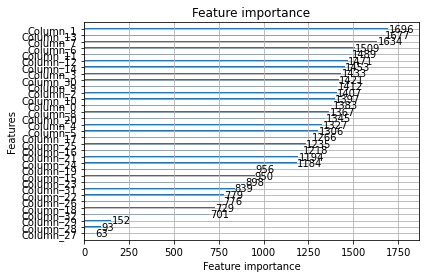

In [275]:
# df.corr(method='pearson')
print (traincols)
lgb.plot_importance(lgbmodel)
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

# # sorted(zip(clf.feature_importances_, X.columns), reverse=True)
# feature_imp = pd.DataFrame(sorted(zip(lgbmodel.feature_importances_,traincols)), columns=['Value','Feature'])

# plt.figure(figsize=(20, 10))
# sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
# plt.title('LightGBM Features (avg over folds)')
# plt.tight_layout()
# plt.show()
# plt.savefig('lgbm_importances-01.png')

In [256]:
bst = lgb.Booster(model_file='lgb_fold_0.txt')